### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset using the pandas dataframe

In [3]:
scores_df = pd.read_csv("C:/Users/lab_services_student/Downloads/scores.csv")  
questionnaire_df = pd.read_csv("C:/Users/lab_services_student/Downloads/User questionnaire - dvrk Dataset Experiment.csv") 

### Exploratory analysis

In [4]:
print("Scores Dataset:")
print(scores_df.head())

print("\nUser Questionnaire Dataset:")
print(questionnaire_df.head())

Scores Dataset:
                File_name      Time  Errors     Score Unnamed: 4
0  X01_Post_and_Sleeve_01  118.4521       0  118.4521        NaN
1  X01_Post_and_Sleeve_02  105.4607       0  105.4607        NaN
2  X01_Post_and_Sleeve_03   97.4461       0   97.4461        NaN
3  X01_Post_and_Sleeve_04   84.6251       0   84.6251        NaN
4  X01_Post_and_Sleeve_05   86.8607       1  101.8607        NaN

User Questionnaire Dataset:
  User Name  Age+ACo- Which is your dominant hand?+ACo-  \
0       X01        29                             Right   
1       X02        40                             Right   
2       X03        32                             Right   
3       X04        25                             Right   
4       X05        27                             Right   

  Which experiment modality did you enjoy most?+ACo-  \
0                                       Pea on a Peg   
1                                       Pea on a Peg   
2                                     Wire

In [5]:
scores_df.shape

(207, 5)

In [6]:
questionnaire_df.shape

(12, 23)

### Check for any null values in the scores dataset

In [7]:
scores_df.isnull().sum()

File_name       0
Time            0
Errors          0
Score           0
Unnamed: 4    206
dtype: int64

### Drop the null values

In [8]:
scores_df = scores_df.drop(columns=['Unnamed: 4'])

In [9]:
scores_df.isnull().sum()

File_name    0
Time         0
Errors       0
Score        0
dtype: int64

### Check for any duplicates in the scores dataset

In [10]:
scores_df.duplicated().any()

False

### Check for any null values in the questionnaire dataset

In [11]:
questionnaire_df.isnull().sum()

User Name                                                                               0
Age+ACo-                                                                                0
Which is your dominant hand?+ACo-                                                       0
Which experiment modality did you enjoy most?+ACo-                                      0
Had you used the dVRK or a da Vinci before?                                             0
+ACI-If so                                                                              8
 which is your level of expertise using the dVRK or a da Vinci+ACI-                     0
Do you have any medical background?+ACo-                                               11
+ACI-If so.1                                                                           11
 which specialty did you attend / are you attending?+ACI-                               0
+ACI-If so.2                                                                            0
 how many 

### Check for any duplicates in the questionnaire dataset

In [12]:
questionnaire_df.duplicated().any()

False

### Rename the columns to make it easier to read

In [13]:
# _____Code Attribution_____
# The following method was taken from GeeksforGeeks
# Author: rituraj_jain
# Link: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

questionnaire_df.rename(columns={'Age+ACo-': 'Age', 'Which is your dominant hand?+ACo-': 'Dominant Hand', 
                          'Which experiment modality did you enjoy most?+ACo-': 'Experiment Modality',
                          'Had you used the dVRK or a da Vinci before?': 'Previous Experience with dVRK or da Vinci',
                          'Do you have any medical background?+ACo-': 'Medical Background?',
                          'Are you fond of videogames?+ACo-': 'Fond of Video Games?',
                          'Had you ever used a haptic device?+ACo-': 'Used Haptic Device Before?'},inplace=True)

# _____end_____


### Only select the relevant columns

In [14]:
questionnaire_df = questionnaire_df[['User Name', 'Age', 'Dominant Hand', 'Experiment Modality', 
                                     'Previous Experience with dVRK or da Vinci', 'Medical Background?', 'Fond of Video Games?', 
                                     'Used Haptic Device Before?']]

### Frequency Distributions 

In [15]:
# Frequency distribution for Dominant Hand
dominant_hand_dist = questionnaire_df['Dominant Hand'].value_counts()
print("Frequency distribution for Dominant Hand:")
print(dominant_hand_dist)

# Frequency distribution for Previous Experience with dVRK or da Vinci
previous_experience_dist = questionnaire_df['Previous Experience with dVRK or da Vinci'].value_counts()
print("\nFrequency distribution for Previous Experience with dVRK or da Vinci:")
print(previous_experience_dist)

# Frequency distribution for Prior Use of a Haptic Device
haptic_dist = questionnaire_df['Used Haptic Device Before?'].value_counts()
print("\nFrequency distribution for Haptic Device:")
print(haptic_dist)

Frequency distribution for Dominant Hand:
Dominant Hand
Right           8
ambidextrous    2
Left            2
Name: count, dtype: int64

Frequency distribution for Previous Experience with dVRK or da Vinci:
Previous Experience with dVRK or da Vinci
No     11
Yes     1
Name: count, dtype: int64

Frequency distribution for Haptic Device:
Used Haptic Device Before?
No     8
Yes    4
Name: count, dtype: int64


### Bar Plots for Frequency Distributions

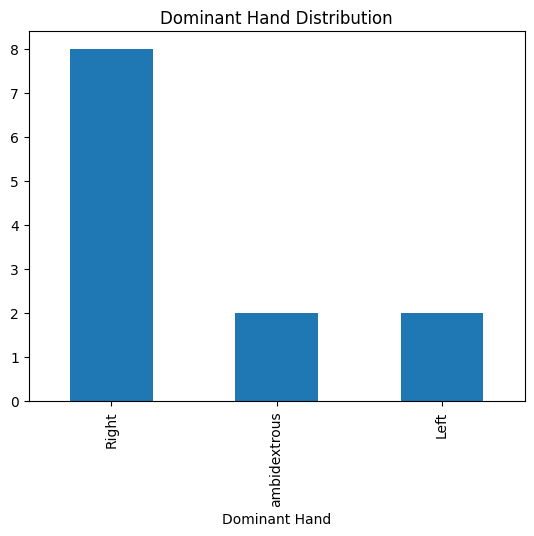

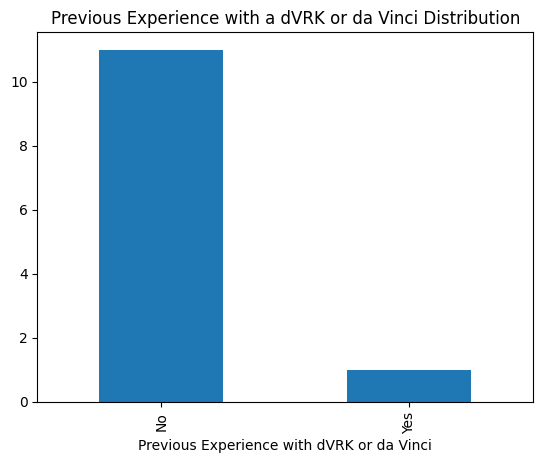

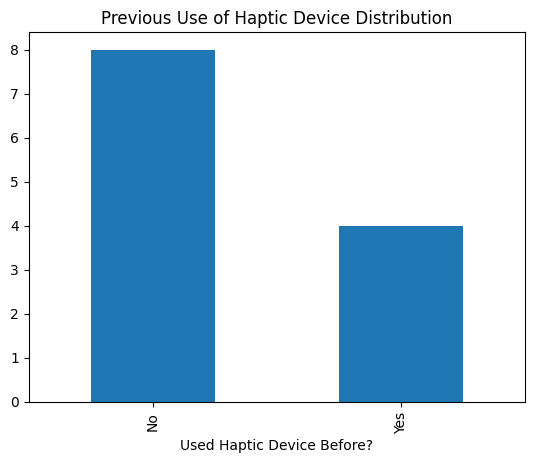

In [16]:
# Plot frequency distribution for Dominant Hand
dominant_hand_dist.plot(kind='bar', title='Dominant Hand Distribution')
plt.show()

# Plot frequency distribution for Previous Experience
previous_experience_dist.plot(kind='bar', title='Previous Experience with a dVRK or da Vinci Distribution')
plt.show()

# Plot frequency distribution for Haptic Device
haptic_dist.plot(kind='bar', title='Previous Use of Haptic Device Distribution')
plt.show()

### Bar Plot for Average Errors vs Age

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_8084\3294050582.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=errors_avg['Errors'], y=errors_avg['Age'], ci=None)


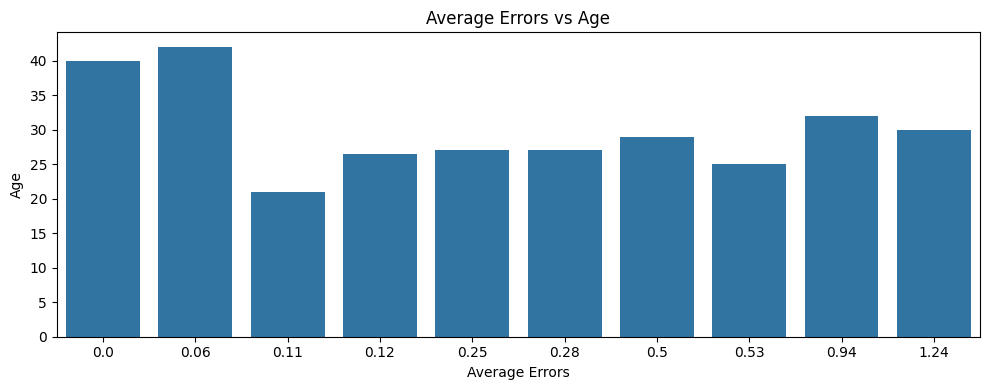

In [17]:
# _____Code Attribution_____
# The following method was taken from GeeksforGeeks
# Author: pawan_asipu
# Link: https://www.geeksforgeeks.org/python-string-split/

# Extract User ID from the File_name column
scores_df['UserID'] = scores_df['File_name'].str.split('_').str[0] 

# _____end_____

# Aggregate Errors by taking the mean for each UserID
errors_avg = scores_df.groupby('UserID')['Errors'].mean().reset_index()

ages = [29, 40, 32, 25, 27, 21, 27, 42, 26, 34, 26, 27]  

# Add the ages to the errors_avg DataFrame
errors_avg['Age'] = ages

#Round the Errors to 2decimal points
errors_avg['Errors'] = errors_avg['Errors'].round(2)


plt.figure(figsize=(10, 4))
sns.barplot(x=errors_avg['Errors'], y=errors_avg['Age'], ci=None)
plt.title('Average Errors vs Age')
plt.xlabel('Average Errors')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### Bar Plot for Score Distribution by Age Group

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_8084\1093620583.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=questionnaire_df['Age_Group'], y=scores_df['Score'], ci=None)


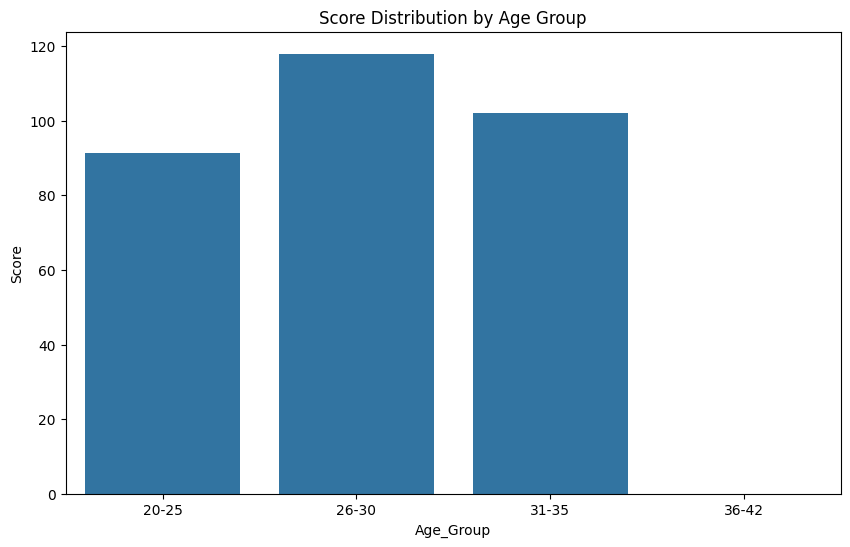

In [18]:
questionnaire_df['Age_Group'] = pd.cut(questionnaire_df['Age'], bins=[0, 25, 35, 45, 55], labels=['20-25', '26-30', '31-35', '36-42'])
plt.figure(figsize=(10, 6))
sns.barplot(x=questionnaire_df['Age_Group'], y=scores_df['Score'], ci=None)
plt.title('Score Distribution by Age Group')
plt.show()

### Bar Plot for Score Distribution by Previous Experience

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_8084\3839430764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=questionnaire_df['Previous Experience with dVRK or da Vinci'], y=scores_df['Score'], ci=None)


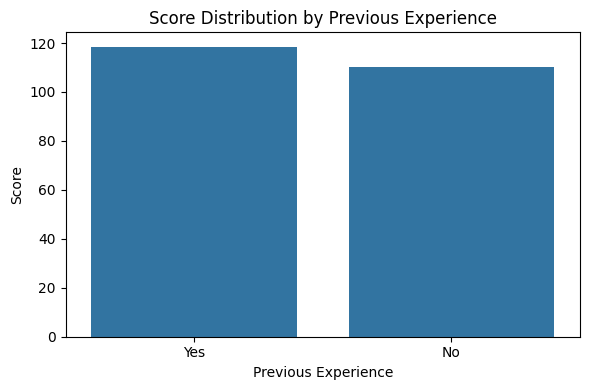

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=questionnaire_df['Previous Experience with dVRK or da Vinci'], y=scores_df['Score'], ci=None)
plt.title('Score Distribution by Previous Experience')
plt.xlabel('Previous Experience')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

### Bar Plot for Errors Distribution by Previous Experience

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_8084\1615322105.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=questionnaire_df['Previous Experience with dVRK or da Vinci'], y=scores_df['Errors'], ci=None)


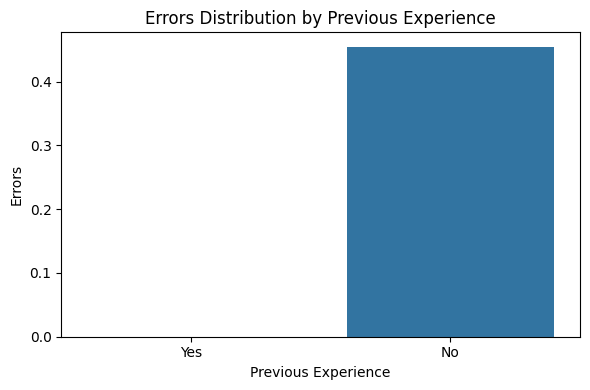

In [20]:
plt.figure(figsize=(6, 4))
sns.barplot(x=questionnaire_df['Previous Experience with dVRK or da Vinci'], y=scores_df['Errors'], ci=None)
plt.title('Errors Distribution by Previous Experience')
plt.xlabel('Previous Experience')
plt.ylabel('Errors')

plt.tight_layout()
plt.show()

### Machine Learning

### Choose feature and target

In [21]:
# _____Code Attribution_____
# The following method was taken from GeeksforGeeks
# Author: avik_dutta
# Link: https://www.geeksforgeeks.org/random-forest-regression-in-python/

features = ['Time', 'Errors']  
target = 'Score'

In [22]:
X = scores_df[features]
y = scores_df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model

In [24]:
model = RandomForestRegressor()

### Fit the model

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor()

### Make predictions using 'X_test'

In [26]:
y_pred = model.predict(X_test)

### Check the mean squared error of the model

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 38.66166683530386


### Check the R² Score of the model

In [29]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# _____end_____

R² Score: 0.98980149409079


### Check feature importances

In [30]:
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Time, Importance: 0.9910779721000187
Feature: Errors, Importance: 0.008922027899981403


### Scatter Plot for the Actual vs Predicted Scores 

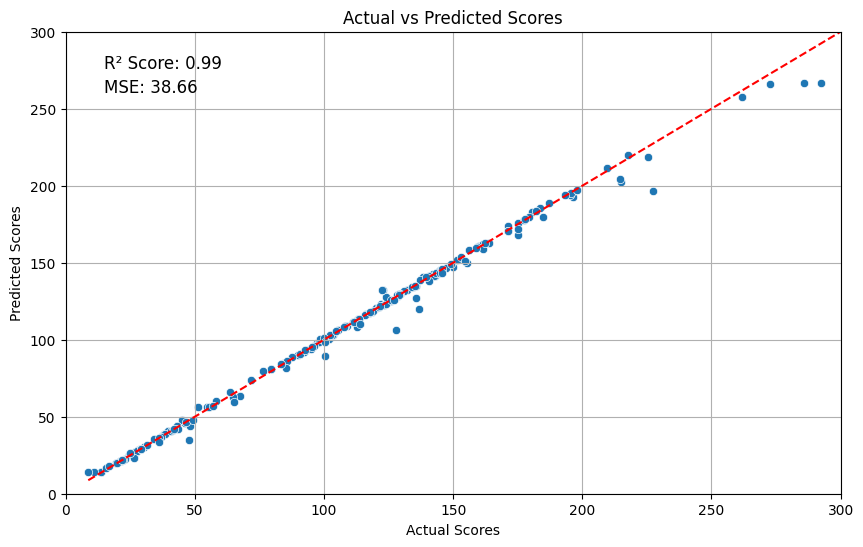

In [31]:
actual_values = scores_df['Score']  # Actual scores
predicted_values = model.predict(X)  # Predicted scores from model

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_values, y=predicted_values)
plt.plot([actual_values.min(), actual_values.max()], 
         [actual_values.min(), actual_values.max()], 
         color='red', linestyle='--')  # Line of equality
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add R² and MSE annotations
plt.text(0.05, 0.95, f'R² Score: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlim([0, 300])  
plt.ylim([0, 300])  
plt.grid()
plt.show()
